## Initialisierung

In [1]:
from pathlib import Path
from scipy import stats

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

np.set_printoptions(suppress=True)

pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.max_colwidth = None

from IPython.display import display, Markdown

In [2]:
path1 = Path(r"A:\Workspace\Python\Masterarbeit\Kaggle Home Credit Datensatz")
path2 = Path(r"C:\Users\rober\Documents\Workspace\Python\Masterarbeit\Kaggle Home Credit Datensatz")

if path1.is_dir():
    DATASET_DIR = path1
else:
    DATASET_DIR = path2

In [3]:
app_train = pd.read_csv(DATASET_DIR / "application_train.csv")
previous_application = pd.read_csv(DATASET_DIR / "previous_application.csv")
description = pd.read_csv(DATASET_DIR / "HomeCredit_columns_description.csv", encoding="latin", index_col=0)

# Feature Beschreibung Previous Application

In [4]:
description.loc[description['Table']=="previous_application.csv", "Row":"Special"]

,Row,Description,Special
176,SK_ID_PREV,"ID of previous credit in Home credit related to loan in our sample. (One loan in our sample can have 0,1,2 or more previous loan applications in Home Credit, previous application could, but not necessarily have to lead to credit)",hashed
177,SK_ID_CURR,ID of loan in our sample,hashed
178,NAME_CONTRACT_TYPE,"Contract product type (Cash loan, consumer loan [POS] ,...) of the previous application",NaN
179,AMT_ANNUITY,Annuity of previous application,NaN
180,AMT_APPLICATION,For how much credit did client ask on the previous application,NaN
181,AMT_CREDIT,"Final credit amount on the previous application. This differs from AMT_APPLICATION in a way that the AMT_APPLICATION is the amount for which the client initially applied for, but during our approval process he could have received different amount - AMT_CREDIT",NaN
182,AMT_DOWN_PAYMENT,Down payment on the previous application,NaN
183,AMT_GOODS_PRICE,Goods price of good that client asked for (if applicable) on the previous application,NaN
184,WEEKDAY_APPR_PROCESS_START,On which day of the week did the client apply for previous application,NaN
185,HOUR_APPR_PROCESS_START,Approximately at what day hour did the client apply for the previous application,rounded


In [5]:
previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Function to draw a Piechart
def draw_piechart(arguments):
    fig, ax = plt.subplots(1,len(arguments))
    
    # Handle multiple plots
    try:
        for argument, a in zip(arguments,ax):
            labels = argument[0]
            sizes = argument[1]
            title = argument[2]

            a.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, normalize=False, labeldistance=1.05)
            a.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
            a.set_title(title)
        
    # Handle single plot
    except TypeError:
        for argument in arguments:
            labels = argument[0]
            sizes = argument[1]
            title = argument[2]
            
            ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, normalize=False)
            ax.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
            ax.set_title(title)
            
    plt.show()

## Datenaufbereitung

In [7]:
# Schnittmenge zwischen app_train und bureau
# Ergänzt die Variable "TARGET" in dem bureau-Datensatz
previous_application = pd.merge(previous_application, app_train[["SK_ID_CURR","TARGET"]] ,on="SK_ID_CURR")

# Austausch der numerischen Kategorien durch sprechende, interpretierbare Variablen
previous_application["TARGET"].replace(
    {
        0: "Payback",
        1: "Default"
    }, inplace = True
)

# Unterteilung des Datensatzen nach Payback und Default
payback = previous_application[previous_application["TARGET"] == "Payback"]
default = previous_application[previous_application["TARGET"] == "Default"]

In [8]:
skip = ["SK_ID_PREV", "SK_ID_CURR", "TARGET"]

In [9]:
n_heads = [element for element in previous_application.columns if previous_application[element].dtype.name == "object"]
n_heads = [element for element in n_heads if element not in skip]
n_heads += ["NFLAG_LAST_APPL_IN_DAY", "NFLAG_INSURED_ON_APPROVAL", "HOUR_APPR_PROCESS_START", "CNT_PAYMENT"]

m_heads = [element for element in previous_application.columns if previous_application[element].dtype.name != "object"]
m_heads = [element for element in m_heads if element not in skip]
m_heads = [element for element in m_heads if element not in n_heads]


n = previous_application[n_heads]
m = previous_application[m_heads]

# Metadaten

In [10]:
SK_APP = np.array(app_train.SK_ID_CURR)
SK_PA = np.array(previous_application.SK_ID_CURR.unique())
intersect = np.intersect1d(SK_APP, SK_PA)

print(len(SK_APP))
print(len(SK_PA))
print(len(intersect))

COL = previous_application.columns

print(len(COL)-3) # - "SK_ID_CURR, SK_ID_PREV, TARGET"
print(len(n.columns))
print(len(m.columns))

307511
291057
291057
35
20
15


## Datenanalyse

## kategorische Variablen

In [11]:
n["CODE_REJECT_REASON"].value_counts()

XAP       1145533
HC         145984
LIMIT       47773
SCO         32636
CLIENT      22771
SCOFR       10875
XNA          4378
VERIF        3079
SYSTEM        672
Name: CODE_REJECT_REASON, dtype: int64

In [12]:
n.head()

,NAME_CONTRACT_TYPE,WEEKDAY_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,PRODUCT_COMBINATION,NFLAG_LAST_APPL_IN_DAY,NFLAG_INSURED_ON_APPROVAL,HOUR_APPR_PROCESS_START,CNT_PAYMENT
0,Consumer loans,SATURDAY,Y,XAP,Approved,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,Connectivity,middle,POS mobile with interest,1,0.0,15,12.0
1,Consumer loans,SATURDAY,Y,XAP,Refused,Cash through the bank,SCO,NaN,Repeater,Clothing and Accessories,POS,XNA,Regional / Local,Furniture,low_normal,POS industry with interest,1,NaN,18,36.0
2,Consumer loans,SUNDAY,Y,XAP,Approved,Cash through the bank,XAP,NaN,New,Furniture,POS,XNA,Stone,Furniture,middle,POS industry with interest,1,0.0,14,12.0
3,Cash loans,THURSDAY,Y,XNA,Approved,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,XNA,low_action,Cash X-Sell: low,1,1.0,11,36.0
4,Cash loans,WEDNESDAY,Y,XNA,Approved,XNA,XAP,NaN,Repeater,XNA,Cash,x-sell,AP+ (Cash loan),XNA,low_normal,Cash X-Sell: low,1,1.0,9,36.0


In [13]:
result = {
    "head" : [],
    "cat" : [],
    "payback" : [],
    "default" : [],
    "diff" : []
}

for head in n.columns.values:
    df1 = payback[head].value_counts().rename_axis(head).reset_index(name='payback').head()
    df2 = default[head].value_counts().rename_axis(head).reset_index(name='default').head()
    
    df1["payback"] = df1["payback"]/df1["payback"].sum()*100
    df2["default"] = df2["default"]/df2["default"].sum()*100
    
    df = df1.merge(df2, how="outer", on=head)
    
    df["diff"] = (df["default"]-df["payback"])
    
    df = df.sort_values("diff", ascending=False)
    
    for diff in df["diff"]:
        if np.isnan(diff):
            continue
        if diff > 5 or diff < -5:
            row = df.loc[df["diff"] == diff]
            cat = row[head][row[head].index[0]]
            
            result["head"].append(head)
            result["cat"].append(cat)
            result["payback"].append(round(row["payback"].values[0],2))
            result["default"].append(round(row["default"].values[0],2))
            result["diff"].append(round(diff,2))

In [14]:
df = pd.DataFrame(result)
df.sort_values("diff", ascending=False)

,head,cat,payback,default,diff
1,NAME_CONTRACT_STATUS,Refused,16.72,24.06,7.34
0,NAME_CONTRACT_TYPE,Consumer loans,44.69,39.40,-5.29
4,NAME_PORTFOLIO,POS,42.38,36.97,-5.40
3,CODE_REJECT_REASON,XAP,82.68,76.05,-6.63
2,NAME_CONTRACT_STATUS,Approved,63.41,54.96,-8.46


## metrische Variablen

In [15]:
m.head()

,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION
0,1730.430,17145.0,17145.0,0.0,17145.0,0.000000,0.182832,0.867336,-73,35,365243.0,-42.0,300.0,-42.0,-37.0
1,68258.655,1800000.0,1754721.0,180000.0,1800000.0,0.101325,NaN,NaN,-472,55,NaN,NaN,NaN,NaN,NaN
2,12417.390,108400.5,119848.5,0.0,108400.5,0.000000,NaN,NaN,-548,196,365243.0,-512.0,-182.0,-392.0,-387.0
3,25188.615,607500.0,679671.0,NaN,607500.0,NaN,NaN,NaN,-164,-1,365243.0,-134.0,916.0,365243.0,365243.0
4,21709.125,450000.0,512370.0,NaN,450000.0,NaN,NaN,NaN,-515,6,365243.0,-485.0,565.0,-155.0,-147.0


# Histogramme und Dichtefunktionen aller metrischen Features

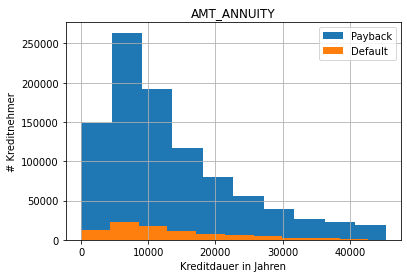

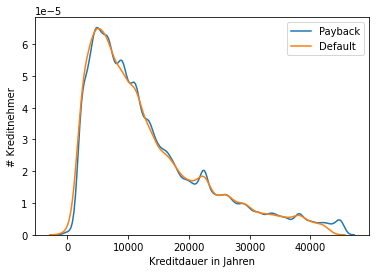

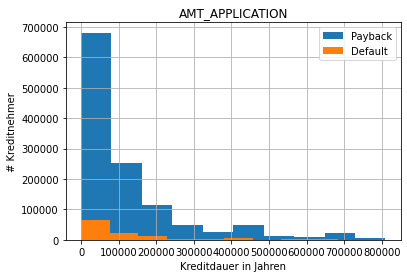

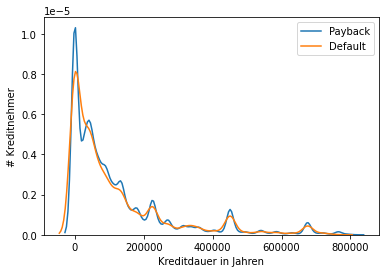

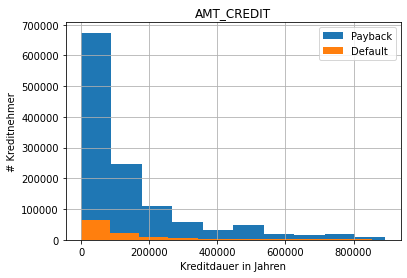

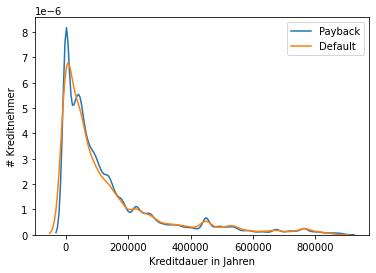

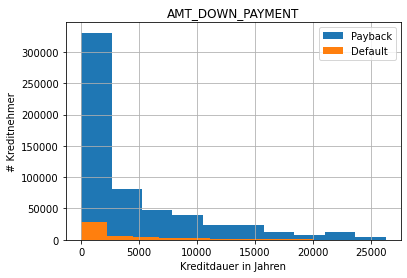

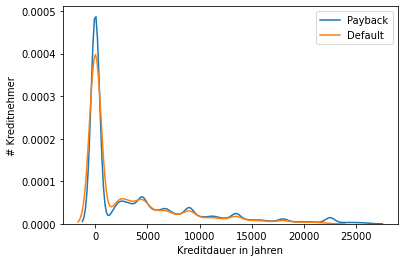

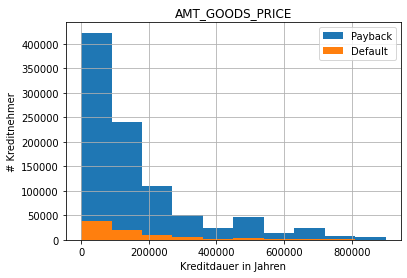

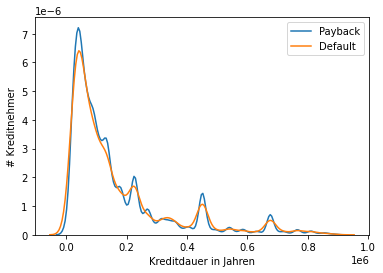

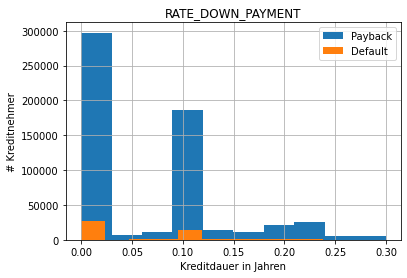

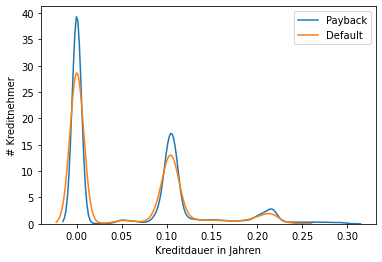

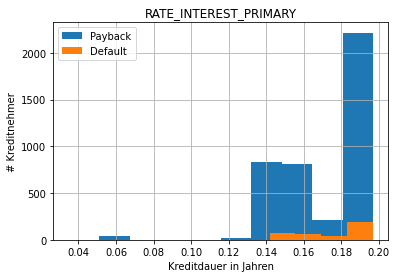

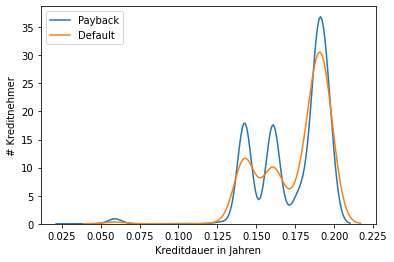

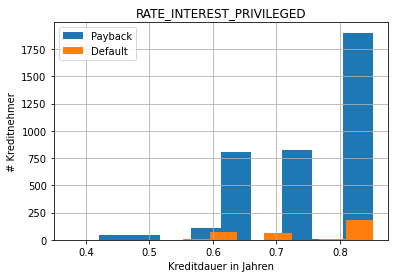

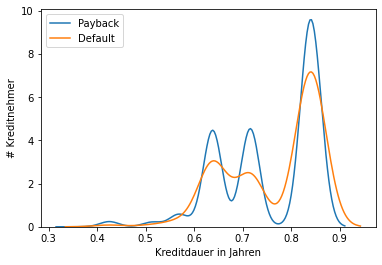

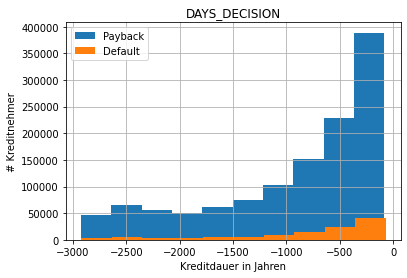

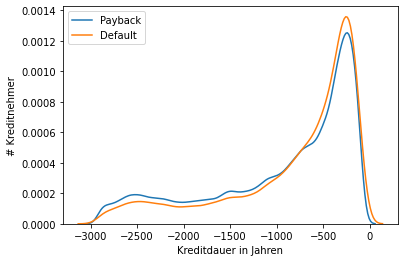

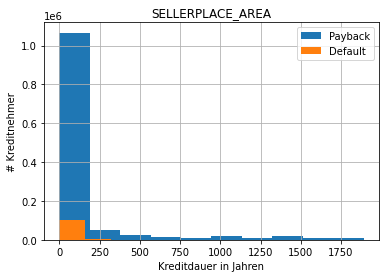

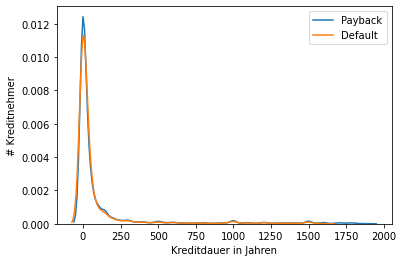

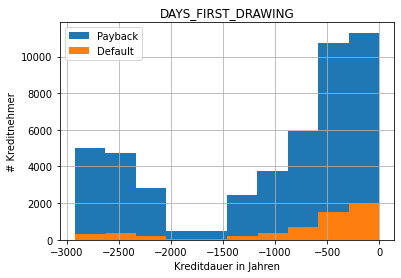

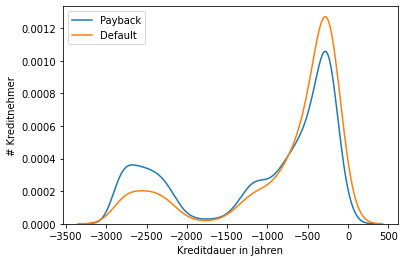

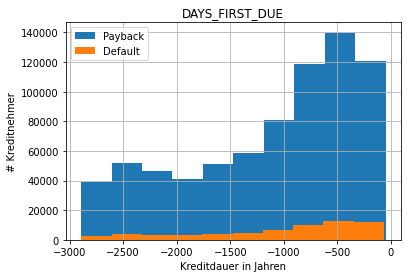

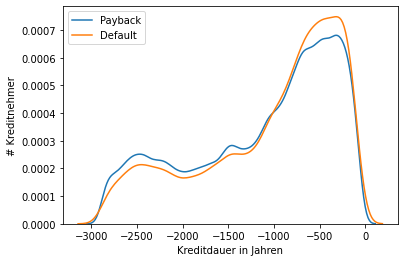

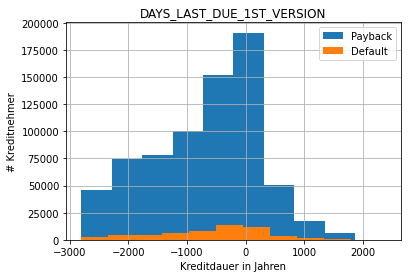

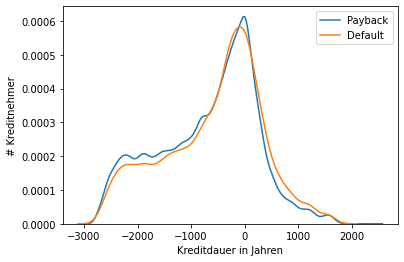

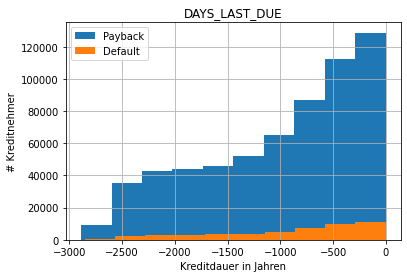

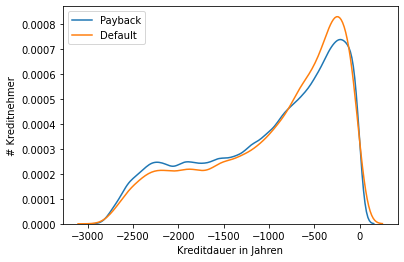

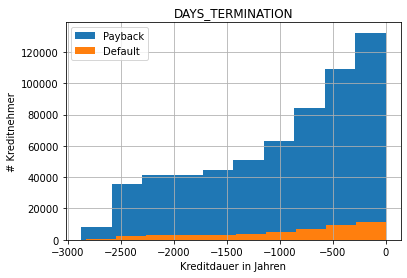

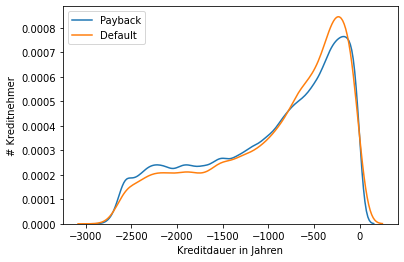

In [18]:
for head in m_heads:

    pb = payback[head].copy()
    df = default[head].copy()

    pb = pb[pb < pb.quantile(0.95)]
    df = df[df < df.quantile(0.95)]

    pb.hist()
    df.hist()

    plt.title(head)
    plt.legend(labels=["Payback","Default"])
    plt.xlabel("Kreditdauer in Jahren")
    plt.ylabel("# Kreditnehmer")
    plt.show()

    sns.kdeplot(pb).get_lines()[0].get_data()
    sns.kdeplot(df).get_lines()[1].get_data()

    plt.legend(labels=["Payback","Default"])
    plt.xlabel("Kreditdauer in Jahren")
    plt.ylabel("# Kreditnehmer")
    plt.show()

# Betrachtung zeitbezogener Daten

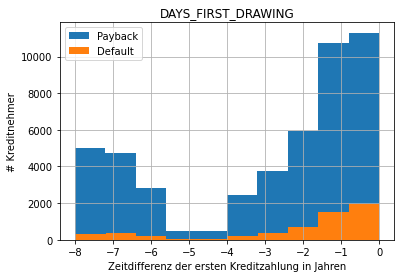

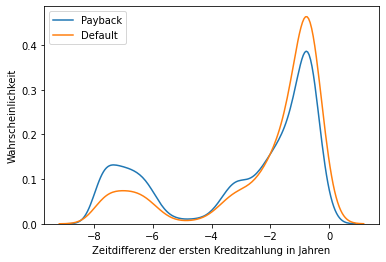

In [19]:
head = "DAYS_FIRST_DRAWING"

pb = payback[head].copy()
df = default[head].copy()

pb = pb[pb < pb.quantile(0.95)]
df = df[df < df.quantile(0.95)]

pb /= 365
df /= 365

xlabel = "Zeitdifferenz der ersten Kreditzahlung in Jahren"

pb.hist()
df.hist()

plt.title(head)
plt.legend(labels=["Payback","Default"])
plt.xlabel(xlabel)
plt.ylabel("# Kreditnehmer")
plt.show()

sns.kdeplot(pb).get_lines()[0].get_data()
sns.kdeplot(df).get_lines()[1].get_data()

plt.legend(labels=["Payback","Default"])
plt.xlabel(xlabel)
plt.ylabel("Wahrscheinlichkeit")
plt.show()

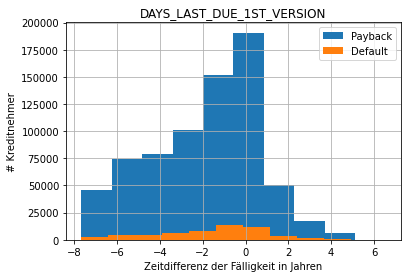

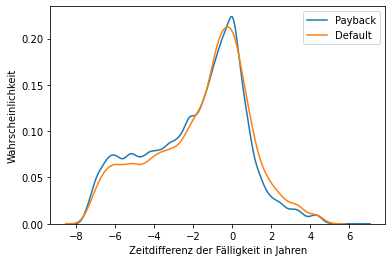

In [20]:
head = "DAYS_LAST_DUE_1ST_VERSION"

pb = payback[head].copy()
df = default[head].copy()

pb = pb[pb < pb.quantile(0.95)]
df = df[df < df.quantile(0.95)]

pb /= 365
df /= 365

xlabel = "Zeitdifferenz der Fälligkeit in Jahren"

pb.hist()
df.hist()

plt.title(head)
plt.legend(labels=["Payback","Default"])
plt.xlabel(xlabel)
plt.ylabel("# Kreditnehmer")
plt.show()

sns.kdeplot(pb).get_lines()[0].get_data()
sns.kdeplot(df).get_lines()[1].get_data()

plt.legend(labels=["Payback","Default"])
plt.xlabel(xlabel)
plt.ylabel("Wahrscheinlichkeit")
plt.show()

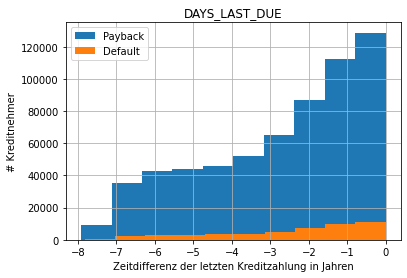

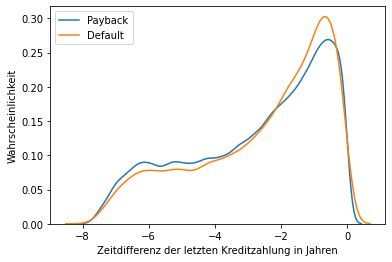

In [21]:
head = "DAYS_LAST_DUE"

pb = payback[head].copy()
df = default[head].copy()

pb = pb[pb < pb.quantile(0.95)]
df = df[df < df.quantile(0.95)]

pb /= 365
df /= 365

xlabel = "Zeitdifferenz der letzten Kreditzahlung in Jahren"

pb.hist()
df.hist()

plt.title(head)
plt.legend(labels=["Payback","Default"])
plt.xlabel(xlabel)
plt.ylabel("# Kreditnehmer")
plt.show()

sns.kdeplot(pb).get_lines()[0].get_data()
sns.kdeplot(df).get_lines()[1].get_data()

plt.legend(labels=["Payback","Default"])
plt.xlabel(xlabel)
plt.ylabel("Wahrscheinlichkeit")
plt.show()

In [22]:
previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,TARGET
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.000000,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0,Payback
1,1696966,271877,Consumer loans,68258.655,1800000.0,1754721.0,180000.0,1800000.0,SATURDAY,18,Y,1,0.101325,NaN,NaN,XAP,Refused,-472,Cash through the bank,SCO,NaN,Repeater,Clothing and Accessories,POS,XNA,Regional / Local,55,Furniture,36.0,low_normal,POS industry with interest,NaN,NaN,NaN,NaN,NaN,NaN,Payback
2,2154916,271877,Consumer loans,12417.390,108400.5,119848.5,0.0,108400.5,SUNDAY,14,Y,1,0.000000,NaN,NaN,XAP,Approved,-548,Cash through the bank,XAP,NaN,New,Furniture,POS,XNA,Stone,196,Furniture,12.0,middle,POS industry with interest,365243.0,-512.0,-182.0,-392.0,-387.0,0.0,Payback
3,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0,Payback
4,1536272,108129,Cash loans,21709.125,450000.0,512370.0,NaN,450000.0,WEDNESDAY,9,Y,1,NaN,NaN,NaN,XNA,Approved,-515,XNA,XAP,NaN,Repeater,XNA,Cash,x-sell,AP+ (Cash loan),6,XNA,36.0,low_normal,Cash X-Sell: low,365243.0,-485.0,565.0,-155.0,-147.0,1.0,Payback
